### <b> Computational Graphs and Backpropagation</b>

Doesn't Tensorflow perform backprop automatically?
Deep learning frameworks such as Tensorflow and Torch perform backpropagation and gradient descent automatically. So, why do we need to understand it?
<br>
The answer is, because although the calculations are abstracted out by libraries, gradient descent on neural networks is susceptible to various issues such as vanishing gradients, dead neurons, etc. When we are trying to train a neural network and we face these problems, we will not be able to resolve it unless we understand whats going on behind the scenes.
<br>
<b>Why computational graphs?</b><br>
Computational graph is how backpropagation is implemented in deep learning frameworks like Tensorflow, Torch, Theano, etc. More importantly, understanding backpropagation on computational graphs unites multiple different backpropagation algorithms and its variations (such as backprop through time, backprop with shared weights). Once you convert everything to a computational graph, they are all the same algorithm - just backpropagation on computational graphs.
<br>
<b>Computational Graph, What is it?</b><br>
A computational graph is a directed graph where the nodes correspond to mathematical operations. It is a way of expressing and evaluating a mathematical expression.
<br>


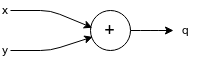

In [5]:
import math
from  IPython.display import Image
import numpy as np
import os
import random
Image(filename=os.getcwd()+"/images/comp1.png")

For example, above is a simple mathematical equation.<br>
<b>q=x+y</b><br>
Let's take another example, slightly more complex. We have the following equation.<br>
<b>f=(x+y)∗z</b><br>
Which is represented by the following computational graph.

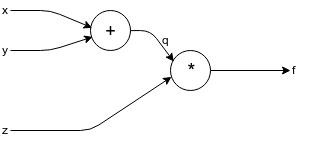

In [6]:
Image(filename=os.getcwd()+"/images/comp2.png")

### Forward pass
Forward pass is the procedure for evaluating the value of the mathematical expression represented by computational graphs. Doing forward pass means we are passing the value from variables in forward direction (toward node's output).

Let's take an example by giving some value to all of the inputs. Suppose, the following values are given to all of the inputs.

x
=
2
,
y
=
3
,
z
=
−
4
By giving those values to the inputs we could do forward pass and get the following values for the outputs on each node.<br>
First, we use the value of x = 2 and y = 3, to get q = 5. Then we use q = 5 and z = -4 to get f = -20. We go from left to right, forwards.

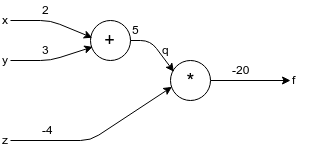

In [7]:
Image(filename=os.getcwd()+"/images/comp3.png")

### Backward Pass (backpropagation)
In the backward pass, our goal is to calculate the gradients for each input with respect to the final output. These gradients are required for training the neural network using gradient descent.

For our running example, we desire the following gradients.


:
∂
f/
∂
x
,
 
∂
f/
∂
y
,
 
∂
f/
∂
z
<br>
Backward pass (backpropagation)
We start the backward pass by derivating the final output with respect to the final output (itself!). Thus, it will result in the identity derivation and the value is equal to one.

∂
f
∂
f
=
1
<br>
i.e. our computational graph now looks as follows,

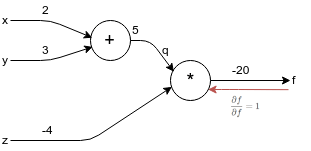

In [8]:
Image(filename=os.getcwd()+"/images/comp4.png")

Next, we will do the backward pass through the "*" operation, i.e. we'll calculate the gradients at q and z. Since f = q*z, we know that

∂
f
∂
q
=
z
,
 
∂
f
∂
z
=
q
We already know the values of z and q from the forward pass. Hence, we get

∂
f
∂
z
=
q
=
5
and

∂
f
∂
q
=
z
=
−
4
So the graph now looks as follows:

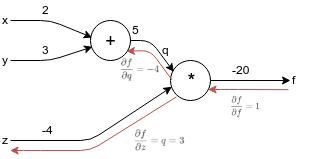

In [9]:
Image(filename=os.getcwd()+"/images/comp5.png")

Now comes the interesting part. We want to calculate the gradients at x and y, i.e.

∂
f
∂
x
,
 
∂
f
∂
y
but we want to do this efficiently (although x and f are only two hops away in this graph, imagine them being really far from each other). To calculate these values efficiently, we'll use the chain rule of differentiation. From chain rule, we have

∂
f
∂
x
=
∂
f
∂
q
∂
q
∂
x
 
 
 
 
 
 
 
 
 
∂
f
∂
y
=
∂
f
∂
q
∂
q
∂
y
But we already know the df/dq = -4 (which is the difficult term to calculate here if the graph is large). dq/dx and dq/dy are easy since q directly depends on x and y. We have,

q
=
x
+
y
 
⇒
 
∂
q
∂
x
=
1
,
 
∂
q
∂
y
=
1
Hence, we get

∂
f
∂
x
=
∂
f
∂
q
∂
q
∂
x
=
(
−
4
)
.1
=
−
4
And for the input y.

∂
f
∂
y
=
∂
f
∂
q
∂
q
∂
y
=
(
−
4
)
.1
=
−
4
And our final graph.

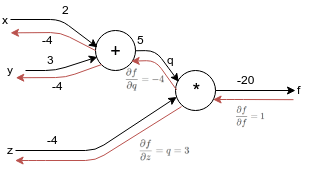

In [11]:
Image(filename=os.getcwd()+"/images/comp6.png")

The main reason for doing this backwards is that when we had to calculate the gradient at x, we only used already computed values, and dq/dx (derivative of node output with respect to the same node's input). We used local information to compute a global value